# Download

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


# Get Landmarks Dataset

In [ ]:
import os
import cv2
import csv
import mediapipe as mp
import numpy as np

## x

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=False)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    pose_landmarks = [0] * 33 if not results.pose_landmarks else [lm.x for lm in results.pose_landmarks.landmark]
                    left_hand_landmarks = [0] * 21 if not results.left_hand_landmarks else [lm.x for lm in results.left_hand_landmarks.landmark]
                    right_hand_landmarks = [0] * 21 if not results.right_hand_landmarks else [lm.x for lm in results.right_hand_landmarks.landmark]

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## x,y

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=True)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    pose_landmarks = [0] * 66 if not results.pose_landmarks else [lm.x for lm in results.pose_landmarks.landmark] + [lm.y for lm in results.pose_landmarks.landmark]
                    left_hand_landmarks = [0] * 42 if not results.left_hand_landmarks else [lm.x for lm in results.left_hand_landmarks.landmark] + [lm.y for lm in results.left_hand_landmarks.landmark]
                    right_hand_landmarks = [0] * 42 if not results.right_hand_landmarks else [lm.x for lm in results.right_hand_landmarks.landmark] + [lm.y for lm in results.right_hand_landmarks.landmark]

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## x,y,z

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=False)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    # Extract landmarks or fill with zeros if not detected
                    pose_landmarks = [0] * 3 * 33 if not results.pose_landmarks else [lm.x for lm in results.pose_landmarks.landmark] + [lm.y for lm in results.pose_landmarks.landmark] + [lm.z for lm in results.pose_landmarks.landmark]
                    left_hand_landmarks = [0] * 3 * 21 if not results.left_hand_landmarks else [lm.x for lm in results.left_hand_landmarks.landmark] + [lm.y for lm in results.left_hand_landmarks.landmark] + [lm.z for lm in results.left_hand_landmarks.landmark]
                    right_hand_landmarks = [0] * 3 * 21 if not results.right_hand_landmarks else [lm.x for lm in results.right_hand_landmarks.landmark] + [lm.y for lm in results.right_hand_landmarks.landmark] + [lm.z for lm in results.right_hand_landmarks.landmark]

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## Normalize Landmarks x

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=False)

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the normalize_landmarks function
    def normalize_landmarks(landmarks):
        if landmarks:
            # Extract x coordinates
            coords = np.array([[lm.x] for lm in landmarks.landmark])

            # Normalize each dimension separately
            min_vals = np.min(coords, axis=0)
            max_vals = np.max(coords, axis=0)
            normalized_coords = (coords - min_vals) / (max_vals - min_vals + 1e-8)

            # Flatten and return as a list
            return normalized_coords.flatten().tolist()
        else:
            return None

    # Process each video file in the input folder
    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    # Extract landmarks or fill with zeros if not detected
                    pose_landmarks = normalize_landmarks(results.pose_landmarks) if results.pose_landmarks else [0] * 3 * 33
                    left_hand_landmarks = normalize_landmarks(results.left_hand_landmarks) if results.left_hand_landmarks else [0] * 3 * 21
                    right_hand_landmarks = normalize_landmarks(results.right_hand_landmarks) if results.right_hand_landmarks else [0] * 3 * 21

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## Normalize Landmark x,y

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=False)

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the normalize_landmarks function
    def normalize_landmarks(landmarks):
        if landmarks:
            # Extract x, y coordinates
            coords = np.array([[lm.x, lm.y] for lm in landmarks.landmark])

            # Normalize each dimension separately
            min_vals = np.min(coords, axis=0)
            max_vals = np.max(coords, axis=0)
            normalized_coords = (coords - min_vals) / (max_vals - min_vals + 1e-8)

            # Flatten and return as a list
            return normalized_coords.flatten().tolist()
        else:
            return None

    # Process each video file in the input folder
    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    # Extract landmarks or fill with zeros if not detected
                    pose_landmarks = normalize_landmarks(results.pose_landmarks) if results.pose_landmarks else [0] * 3 * 33
                    left_hand_landmarks = normalize_landmarks(results.left_hand_landmarks) if results.left_hand_landmarks else [0] * 3 * 21
                    right_hand_landmarks = normalize_landmarks(results.right_hand_landmarks) if results.right_hand_landmarks else [0] * 3 * 21

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## Normalize x,y,z

In [ ]:
def extract_skeleton(input_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(static_image_mode=False)

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the normalize_landmarks function
    def normalize_landmarks(landmarks):
        if landmarks:
            # Extract x, y, z coordinates
            coords = np.array([[lm.x, lm.y, lm.z] for lm in landmarks.landmark])

            # Normalize each dimension separately
            min_vals = np.min(coords, axis=0)
            max_vals = np.max(coords, axis=0)
            normalized_coords = (coords - min_vals) / (max_vals - min_vals + 1e-8)

            # Flatten and return as a list
            return normalized_coords.flatten().tolist()
        else:
            return None

    # Process each video file in the input folder
    for video_file in sorted(os.listdir(input_folder)):
        if video_file.endswith('.mov'):
            video_path = os.path.join(input_folder, video_file)
            video_name = os.path.splitext(video_file)[0]
            csv_file_path = os.path.join(output_folder, f"{video_name}.csv")

            with open(csv_file_path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["frame_index", "left_hand_landmarks", "right_hand_landmarks", "pose_landmarks"])

                cap = cv2.VideoCapture(video_path)
                frame_index = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Process frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_holistic.process(frame_rgb)

                    # Extract landmarks or fill with zeros if not detected
                    pose_landmarks = normalize_landmarks(results.pose_landmarks) if results.pose_landmarks else [0] * 3 * 33
                    left_hand_landmarks = normalize_landmarks(results.left_hand_landmarks) if results.left_hand_landmarks else [0] * 3 * 21
                    right_hand_landmarks = normalize_landmarks(results.right_hand_landmarks) if results.right_hand_landmarks else [0] * 3 * 21

                    writer.writerow([frame_index, left_hand_landmarks, right_hand_landmarks, pose_landmarks])
                    frame_index += 1

                cap.release()

    mp_holistic.close()

## Execute

In [ ]:
input_folder = '/Video'
csv_output_folder = '/Landmarks Dataset'

extract_skeleton(input_folder, csv_output_folder)

# Extract Features and Label

In [ ]:
import os
import pandas as pd
import ast
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import random
import tensorflow as tf

In [ ]:
def extract_features_and_labels(data_folder, max_sequence_length=None):
    features = []
    labels = []

    for file_name in os.listdir(data_folder):
        if file_name.endswith(".csv"):
            file_path = os.path.join(data_folder, file_name)
            df = pd.read_csv(file_path)

            label = file_name.split("_")[0]
            labels.append(label)

            # Feature extraction
            df['left_hand_landmarks'] = df['left_hand_landmarks'].apply(ast.literal_eval)
            df['right_hand_landmarks'] = df['right_hand_landmarks'].apply(ast.literal_eval)
            df['pose_landmarks'] = df['pose_landmarks'].apply(ast.literal_eval)

            feature_list = []
            for index, row in df.iterrows():
                feature_vector = np.concatenate([
                    np.array(row['left_hand_landmarks']),
                    np.array(row['right_hand_landmarks']),
                    np.array(row['pose_landmarks'])
                ])
                feature_list.append(feature_vector)

            features.append(feature_list)

    if max_sequence_length:
        features_padded = [pad_sequences(feature, maxlen=max_sequence_length, padding='post', dtype='float32') for feature in features]
    else:
        features_padded = [np.array(feature) for feature in features]

    return features_padded, labels

In [ ]:
# Reset Data
features_path = 'features.npy'
labels_path = 'labels.npy'
padded_features_path = 'padded_features.npy'
encoded_labels_path = 'encoded_labels.npy'
label_encoder_path = 'label_encoder.pkl'

if (os.path.exists(features_path) and
    os.path.exists(labels_path) and
    os.path.exists(padded_features_path) and
    os.path.exists(encoded_labels_path) and
    os.path.exists(label_encoder_path)):

    # Load the saved data
    features = np.load(features_path, allow_pickle=True)
    labels = np.load(labels_path, allow_pickle=True)
    X_padded = np.load(padded_features_path, allow_pickle=True)
    y_encoded = np.load(encoded_labels_path, allow_pickle=True)
    label_encoder = joblib.load(label_encoder_path)

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

data_folder = "/Landmarks Dataset"

max_sequence_length = 110
features, labels = extract_features_and_labels(data_folder, max_sequence_length)

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Pad sequences to a fixed length
X_padded = pad_sequences(features, maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')

# Reshape the padded sequences
X_reshaped = np.reshape(X_padded, (len(X_padded), max_sequence_length, -1))

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

## Unidirectional

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the unidirectional LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(max_sequence_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=len(set(y_encoded)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 16
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", training_loss)
print("Training Accuracy:", training_accuracy)

## Bidirectional

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=32, return_sequences=True), input_shape=(max_sequence_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))
model.add(Dense(units=len(set(y_encoded)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 32
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
# Evaluate the model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", training_loss)
print("Training Accuracy:", training_accuracy)

## K-Fold Cross Validation

In [ ]:
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

### LSTM Unidirectional

In [ ]:
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the unidirectional LSTM model architecture
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize variables to hold the results
fold_no = 1
train_acc_per_fold = []
train_loss_per_fold = []
test_acc_per_fold = []
test_loss_per_fold = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_reshaped):
    # Split the data
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=len(set(y_encoded)))

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

    # Evaluate the model on the training set
    training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
    print(f"Fold {fold_no} - Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")

    # Evaluate the model on the testing set
    testing_loss, testing_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Testing Loss: {testing_loss}, Testing Accuracy: {testing_accuracy}")

    # Store the results
    train_acc_per_fold.append(training_accuracy)
    train_loss_per_fold.append(training_loss)
    test_acc_per_fold.append(testing_accuracy)
    test_loss_per_fold.append(testing_loss)

    fold_no += 1

# Print the results
print(f'Average Training Loss: {np.mean(train_loss_per_fold)}, Average Training Accuracy: {np.mean(train_acc_per_fold)}')
print(f'Average Testing Loss: {np.mean(test_loss_per_fold)}, Average Testing Accuracy: {np.mean(test_acc_per_fold)}')

Fold 1 - Training Loss: 0.06275670975446701, Training Accuracy: 0.9821428656578064
Fold 1 - Testing Loss: 0.6573845744132996, Testing Accuracy: 0.8333333134651184
Fold 2 - Training Loss: 0.3308558166027069, Training Accuracy: 0.8809523582458496
Fold 2 - Testing Loss: 0.7720324993133545, Testing Accuracy: 0.7142857313156128
Fold 3 - Training Loss: 0.03534536808729172, Training Accuracy: 0.9940476417541504
Fold 3 - Testing Loss: 0.509827196598053, Testing Accuracy: 0.9285714030265808
Fold 4 - Training Loss: 0.04138147085905075, Training Accuracy: 0.988095223903656
Fold 4 - Testing Loss: 0.12306200712919235, Testing Accuracy: 0.9285714030265808
Fold 5 - Training Loss: 0.16594752669334412, Training Accuracy: 0.9047619104385376
Fold 5 - Testing Loss: 0.8061223030090332, Testing Accuracy: 0.761904776096344
Average Training Loss: 0.1272573783993721, Average Training Accuracy: 0.95
Average Testing Loss: 0.5736857160925866, Average Testing Accuracy: 0.8333333253860473


### LSTM Bidirectional

In [ ]:
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the bidirectional LSTM model architecture
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=32, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=64)))
    model.add(Dropout(0.2))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize variables to hold the results
fold_no = 1
train_acc_per_fold = []
train_loss_per_fold = []
test_acc_per_fold = []
test_loss_per_fold = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_reshaped):
    # Split the data
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=len(set(y_encoded)))

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

    # Evaluate the model on the training set
    training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
    print(f"Fold {fold_no} - Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")

    # Evaluate the model on the testing set
    testing_loss, testing_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Testing Loss: {testing_loss}, Testing Accuracy: {testing_accuracy}")

    # Store the results
    train_acc_per_fold.append(training_accuracy)
    train_loss_per_fold.append(training_loss)
    test_acc_per_fold.append(testing_accuracy)
    test_loss_per_fold.append(testing_loss)

    fold_no += 1

# Print the results
print(f'Average Training Loss: {np.mean(train_loss_per_fold)}, Average Training Accuracy: {np.mean(train_acc_per_fold)}')
print(f'Average Testing Loss: {np.mean(test_loss_per_fold)}, Average Testing Accuracy: {np.mean(test_acc_per_fold)}')

# CNN Model

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(256, kernel_size=1, activation='relu', input_shape=(max_sequence_length, X_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(518, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 32
validation_split = 0.2
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,  validation_split=validation_split)

# Evaluate the model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", training_loss)
print("Training Accuracy:", training_accuracy)

## K-Fold Cross Validation

In [ ]:
import os
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Encode labels if not already encoded
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_encoded)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the CNN model architecture
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(256, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(518, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize variables to hold the results
fold_no = 1
train_acc_per_fold = []
train_loss_per_fold = []
test_acc_per_fold = []
test_loss_per_fold = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_reshaped):
    # Split the data
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=len(set(y_encoded)))

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

    # Evaluate the model on the training set
    training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
    print(f"Fold {fold_no} - Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")

    # Evaluate the model on the testing set
    testing_loss, testing_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Testing Loss: {testing_loss}, Testing Accuracy: {testing_accuracy}")

    # Store the results
    train_acc_per_fold.append(training_accuracy)
    train_loss_per_fold.append(training_loss)
    test_acc_per_fold.append(testing_accuracy)
    test_loss_per_fold.append(testing_loss)

    fold_no += 1

# Print the results
print(f'Average Training Loss: {np.mean(train_loss_per_fold)}, Average Training Accuracy: {np.mean(train_acc_per_fold)}')
print(f'Average Testing Loss: {np.mean(test_loss_per_fold)}, Average Testing Accuracy: {np.mean(test_acc_per_fold)}')

Fold 1 - Training Loss: 1.7894592474476667e-06, Training Accuracy: 1.0
Fold 1 - Testing Loss: 0.6940848231315613, Testing Accuracy: 0.8888888955116272
Fold 2 - Training Loss: 1.6172681398529676e-06, Training Accuracy: 1.0
Fold 2 - Testing Loss: 0.7473397254943848, Testing Accuracy: 0.8444444537162781
Fold 3 - Training Loss: 9.675807177700335e-07, Training Accuracy: 1.0
Fold 3 - Testing Loss: 1.5050913095474243, Testing Accuracy: 0.8888888955116272
Fold 4 - Training Loss: 2.2682811504637357e-06, Training Accuracy: 1.0
Fold 4 - Testing Loss: 0.9135268926620483, Testing Accuracy: 0.8222222328186035
Fold 5 - Training Loss: 9.132745049100777e-07, Training Accuracy: 1.0
Fold 5 - Testing Loss: 1.058759093284607, Testing Accuracy: 0.8888888955116272
Average Training Loss: 1.5111727520888962e-06, Average Training Accuracy: 1.0
Average Testing Loss: 0.9837603688240051, Average Testing Accuracy: 0.8666666746139526


# CNN-LSTM

In [ ]:
import os
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the CNN-LSTM model
model = Sequential()
# Add Conv1D layer
model.add(Conv1D(256, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
# Remove Flatten layer here
# Add Bidirectional LSTM layers
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))
# Add Dense layers
model.add(Dense(518, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 32
validation_split = 0.2
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

# Evaluate the model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", training_loss)
print("Training Accuracy:", training_accuracy)

## K-Fold Cross Validation

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Encode labels if not already encoded
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_encoded)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the CNN-LSTM model architecture
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(256, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=64)))
    model.add(Dropout(0.2))
    model.add(Dense(518, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize variables to hold the results
fold_no = 1
train_acc_per_fold = []
train_loss_per_fold = []
test_acc_per_fold = []
test_loss_per_fold = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_reshaped):
    # Split the data
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=len(set(y_encoded)))

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

    # Evaluate the model on the training set
    training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=0)
    print(f"Fold {fold_no} - Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")

    # Evaluate the model on the testing set
    testing_loss, testing_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Testing Loss: {testing_loss}, Testing Accuracy: {testing_accuracy}")

    # Store the results
    train_acc_per_fold.append(training_accuracy)
    train_loss_per_fold.append(training_loss)
    test_acc_per_fold.append(testing_accuracy)
    test_loss_per_fold.append(testing_loss)

    fold_no += 1

# Print the results
print(f'Average Training Loss: {np.mean(train_loss_per_fold)}, Average Training Accuracy: {np.mean(train_acc_per_fold)}')
print(f'Average Testing Loss: {np.mean(test_loss_per_fold)}, Average Testing Accuracy: {np.mean(test_acc_per_fold)}')

Fold 1 - Training Loss: 1.5874661585257854e-06, Training Accuracy: 1.0
Fold 1 - Testing Loss: 0.01395060308277607, Testing Accuracy: 1.0
Fold 2 - Training Loss: 0.0017683309270069003, Training Accuracy: 1.0
Fold 2 - Testing Loss: 0.4323517382144928, Testing Accuracy: 0.8888888955116272
Fold 3 - Training Loss: 1.125917424360523e-05, Training Accuracy: 1.0
Fold 3 - Testing Loss: 0.47943976521492004, Testing Accuracy: 0.9333333373069763
Fold 4 - Training Loss: 1.69276870565227e-06, Training Accuracy: 1.0
Fold 4 - Testing Loss: 0.22468692064285278, Testing Accuracy: 0.9777777791023254
Fold 5 - Training Loss: 4.7047913540154696e-05, Training Accuracy: 1.0
Fold 5 - Testing Loss: 0.4756845235824585, Testing Accuracy: 0.9333333373069763
Average Training Loss: 0.00036598364993096767, Average Training Accuracy: 1.0
Average Testing Loss: 0.32522271014750004, Average Testing Accuracy: 0.946666669845581


# Prediction & Result

## Prediction

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

correct_predictions = np.sum(predicted_classes == y_test)
total_predictions = y_test.shape[0]
prediction_accuracy = (correct_predictions / total_predictions) * 100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")

2/2 [==============================] - 3s 131ms/step
Prediction Accuracy: 88.89%


In [ ]:
decoded_actual_labels = label_encoder.inverse_transform(y_test)
decoded_predicted_labels = label_encoder.inverse_transform(predicted_classes)

results_df = pd.DataFrame({
    'Actual': decoded_actual_labels,
    'Prediction': decoded_predicted_labels
})

results_df

,Actual,Prediction
0,Doa,Doa
1,Roh Kudus,Amin
2,Hati,Hati
3,Yesus,Yesus
4,Gereja,Gereja
5,Persembahan,Persembahan
6,Firman,Firman
7,Tuhan,Tuhan
8,Amin,Amin
9,Yesus,Yesus


## Visualization

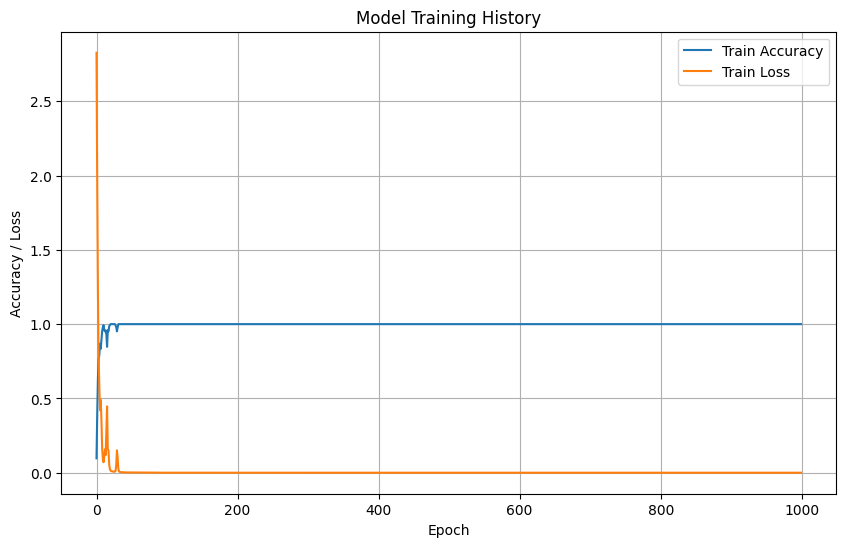

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.show()

## Confusion Matrix

2/2 [==============================] - 0s 65ms/step


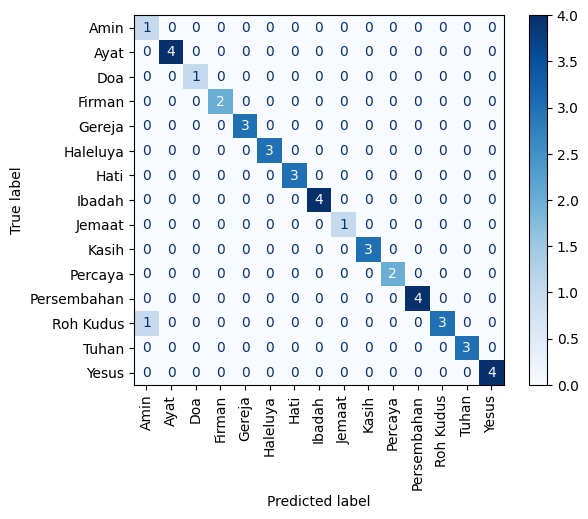

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Ensure the number of unique labels matches the number of classes
unique_classes = np.unique(y_test)
class_labels = label_encoder.inverse_transform(unique_classes)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)
plt.show()

### Save Model

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/SLRS/Model v2/C. Model 4')

# Save the label encoder for later use
import joblib

joblib.dump(label_encoder, '/content/drive/MyDrive/SLRS/Model v2/C. Model 4/label_encoder.joblib')

['/content/drive/MyDrive/SLRS/Model v2/C. Model 4/label_encoder.joblib']